# Data generation of Path Dependent Representative Volume Elements(RVEs)

## 1. Illustration of RVE 
RVE simulation is an effective approach to explore constitutive laws of composites. Generally, An RVE has two material Phases which are matrix phase and fiber phase.  Figure 1 gives an illustration of micro-structure of a 2D RVE. 


<center><img src="figures/tasks_rve.svg" width="=80%"> </center>
<center> Figure 1: Illustration of RVEs, and list of commonalities and discrepancies on setting up tasks </center>
<br>

---
According to [Bessa et al.](https://www.sciencedirect.com/science/article/pii/S0045782516314803), **microstructures**, **material properties**, and **loading conditions** are three major variables which will influence the RVE properties. In order to exploit the advantages and limits of CDDM, several RVEs with similarities and differences are set up as different tasks. In detail, different tasks have different microstructures and material properties and apply the same dependent paths to generate the learning dataset
 

## 2. Tasks set up
From Figure 1, it can be seen that the microstructure of an RVE is controlled by four factors which are size of the square, volume fraction of fiber phase, and distribution parameters for generating fibers. Meanwhile, the material properties of fiber and matrix phases also influence the performance of RVEs significantly. 
<br>
Therefore, several designated microstructures and material properties are given as the design variables for generating different tasks. 

### 2.1 Design variables



#### 2.1.1. microstructure configurations:
>Configuration (a):  
$$v_{frac} = 0.45 , L=0.048 , R_{mu}=0.01, R_{std}=0.003$$  

>Configuration (b): 
$$v_{frac} = 0.30,  L=0.048 , R_{mu}=0.003, R_{std}=0.0$$ 

>Configuration (c): 
$$v_{frac} = 0.15,  L=0.048 , R_{mu}=0.0015, R_{std}=0.00005$$ 

Figure 2 plots different configurations of microstructure: 

<center><img src="figures/tasks_microstructures.svg" width="=80%"> </center>
<center> Figure 2: Schematics of different microstructure configurations </center>
<br>

#### 2.1.2. microstructures generation:

In [1]:
# import needed libraries
from matplotlib import pyplot as plt
import f3dasm

# import the function for generating two-dimensional microstructure 
from rvesimulator.microstructure.circle_particles import CircleParticles 
# define parameters for generating a microstructure  
from rvesimulator.additions.ampitudesampler import AmplitudeGenerator
from rvesimulator.benchmark_master_functions.two_materials_rve import VonMisesPlasticElasticPathLoads

2023-06-20 08:54:20,605 - Imported f3dasm
2023-06-20 08:54:22.390173: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 08:54:22.847039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 08:54:24.072516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-20 08:54:25,499 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-45-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


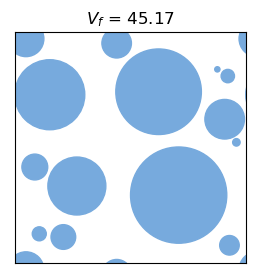

In [2]:

# the user can comment/uncoment the code to generate microstructures for configuration (a)~(c)
size = 0.048 
# parameters for configuration (a)
radius_mu = 0.01 
radius_std = 0.005
vol_fraction = 0.45  
# parameters for configuration (b)
# radius_mu = 0.003
# radius_std = 0.0
# vol_fraction = 0.30 
# parameters for configuration (c)
# radius_mu = 0.0015
# radius_std = 0.0003
# vol_fraction = 0.15 


# initialize the microstructure generator 
microstructrue_generator = CircleParticles(length=size, 
                                           width=size, 
                                           radius_mu=radius_mu, 
                                           radius_std=radius_std, 
                                           vol_req=vol_fraction) 
microstructrue_generator.generate_microstructure(seed=17) 
microstructrue_generator.plot_microstructure(figsize=(3,3) ,save_figure=False) 

# it is noted that the micro-structure might be different on different device because of the influence of seed 

#### 2.2.1  material properties for matrix and fiber phases 
1. matrix material property configurations
The von-Mises plasticity model is selected for matrix material. Meanwhile,  the young' modulus ($E_{matrix} =100 MPa $) and poisson ratio ($\nu = 0.3$) are fixed for all tasks, different hardening laws are designated. 

>linear:  (1) $$\sigma_{y} = 0.5+0.5\bar\epsilon$$ 
>swift:(2) $$\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$$   
>ramberg: (3) $$\sigma_{y} = 0.5(1+ \bar\epsilon)^{1/0.4}$$
> swift: (4) $$\sigma_{y} = 3+0.5(\bar\epsilon)^{0.4}$$   

2. fiber material property configurations 
The fiber material is set to be elastic, and poisson ratio are fixed to be $\nu=0.19$. Whereas, different youngs modulus are chosen.
>(I) $E_{fiber}=1$ MPa \
>(II) $E_{fiber} =10$ MPa\
>(III) $E_{fiber} =1000$ MPa

### 2.3 Design of experiments of tasks 
 In order to set up the tasks properly, meaning different tasks have similarities and dissimilarities, 4 tasks are listed in Table 1. 
<center><img src="figures/tasks_details.png" width="=100%"> </center>
<center> Table 1: Parameters configurations of different tasks  </center>
<br>

## 3. Implementation of generating simulation data of all tasks 

In [ ]:
# design of experiment



In [3]:
# create the doe
# number of path 
num_amplitude = 2 
# initialize path sampler 
path_sampler = AmplitudeGenerator(num_dim=3)
# get paths 
paths = path_sampler.get_amplitude(
    num_amplitude=num_amplitude,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
) 
# convert to dict
samples_dict = paths.to_dict("records")

#### 3.1 Task 1

In [4]:
# initialization 
task1 = VonMisesPlasticElasticPathLoads()
# update simulation info
task1.update_sim_info(mesh_partition=100, 
                        strain=[0.02,0.02,0.02],
                        vol_req=0.45, 
                        radius_mu=0.01,
                        radius_std=0.003, 
                        E_fiber=10,
                        E_matrix=100,
                        hardening_law='linear', 
                        yield_stress = 0.5,
                        a=0.5,
                        num_cpu=6,
                        seed=23,
                        print_info=True) 
task1_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)): 
    task1_results[ii] = task1.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "job_name": "two_materials_rve",
    "size": 0.048,
    "radius_mu": 0.01,
    "radius_std": 0.003,
    "vol_req": 0.45,
    "vol_frac": 0.4503013274307877,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "hardening_law": "linear",
    "hardening_paras": {
        "E_fiber": 10,
        "E_matrix": 100,
        "yield_stress": 0.5,
        "a": 0.5
    },
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}
/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :280.003884 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :270.002673 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<9 out of 30 licenses remain available>.


#### 3.2 Task 2

In [5]:
# initialization 
task2 = VonMisesPlasticElasticPathLoads()
# update simulation info
task2.update_sim_info(mesh_partition=100, 
                        strain=[0.02,0.02,0.02],
                        vol_req=0.30, 
                        radius_mu=0.003,
                        radius_std=0.000, 
                        E_fiber=1.0,
                        E_matrix=100.0,
                        hardening_law='swift', 
                        yield_stress = 0.5,
                        a=0.5,
                        b=0.4,
                        num_cpu=6,
                        seed=17,
                        print_info=True) 
task2_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)): 
    task2_results[ii] = task2.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "job_name": "two_materials_rve",
    "size": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "E_fiber": 1.0,
        "E_matrix": 100.0,
        "yield_stress": 0.5,
        "a": 0.5,
        "b": 0.4
    },
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}
/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<9 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :265.005115 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :225.005122 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


### 3.3 Task 3

In [6]:
# initialization 
task3 = VonMisesPlasticElasticPathLoads()
# update simulation info
task3.update_sim_info(mesh_partition=100, 
                        strain=[0.02,0.02,0.02],
                        vol_req=0.15, 
                        radius_mu=0.0015,
                        radius_std=0.0003, 
                        E_fiber=1000.0,
                        E_matrix=100.0,
                        hardening_law='ramberg', 
                        yield_stress = 0.5,
                        a=0.5,
                        b=0.4,
                        num_cpu=6,
                        seed=17,
                        print_info=True) 
task3_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)): 
    task3_results[ii] = task3.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "job_name": "two_materials_rve",
    "size": 0.048,
    "radius_mu": 0.0015,
    "radius_std": 0.0003,
    "vol_req": 0.15,
    "vol_frac": 0.1522211574766373,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "hardening_law": "ramberg",
    "hardening_paras": {
        "E_fiber": 1000.0,
        "E_matrix": 100.0,
        "yield_stress": 0.5,
        "a": 0.5,
        "b": 0.4
    },
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}
/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :300.004026 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<9 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<9 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :260.004578 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<9 out of 30 licenses remain available>.


### 3.4 taks 4

In [7]:
# initialization 
task4 = VonMisesPlasticElasticPathLoads()
# update simulation info
task4.update_sim_info(mesh_partition=100, 
                        strain=[0.02,0.02,0.02],
                        vol_req=0.30, 
                        radius_mu=0.003,
                        radius_std=0.000, 
                        E_fiber=1.0,
                        E_matrix=100.0,
                        hardening_law='swift', 
                        yield_stress = 3.0,
                        a=0.5,
                        b=0.4,
                        num_cpu=6,
                        seed=17,
                        print_info=True) 
task4_results = {}
# calculate responses of simulation
for ii in range(len(samples_dict)): 
    task4_results[ii] = task4.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

Simulation information: 

{
    "job_name": "two_materials_rve",
    "size": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "youngs_modulus_matrix": 100.0,
    "poisson_ratio_matrix": 0.3,
    "hardening_law": "swift",
    "hardening_paras": {
        "E_fiber": 1.0,
        "E_matrix": 100.0,
        "yield_stress": 3.0,
        "a": 0.5,
        "b": 0.4
    },
    "youngs_modulus_fiber": 1.0,
    "poisson_ratio_fiber": 0.19,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "num_steps": 100,
    "simulation_time": 1.0,
    "num_cpu": 6,
    "platform": "ubuntu"
}
/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :165.004946 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<8 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<8 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :145.001711 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<8 out of 30 licenses remain available>.


In [19]:
# function for visualize the data 
def plot_path_dependent(task1_results, task2_results, task3_results, task4_results, index):
    fig, ax = plt.subplots(2,3, figsize =(16, 6))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0,0].plot(
        task1_results[index]["strain"][:, 0, 0], label="task 1"
    )
    ax[0,0].plot(
        task2_results[index]["strain"][:, 0, 0], label="task 2"
    )
    ax[0,0].plot(
        task3_results[index]["strain"][:, 0, 0], label="task 3"
    )
    ax[0,0].plot(
        task4_results[index]["strain"][:, 0, 0], label="task 4"
    )

    ax[0,0].set(**pparam)
    ax[0,0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0,1].plot(
        task1_results[index]["strain"][:, 0, 1], label="task 1"
    )
    ax[0,1].plot(
        task2_results[index]["strain"][:, 0, 1], label="task 2"
    )
    ax[0,1].plot(
        task3_results[index]["strain"][:, 0, 1], label="task 3"
    )
    ax[0,1].plot(
        task4_results[index]["strain"][:, 0, 1], label="task 4"
    )
    ax[0,1].set(**pparam) 
    ax[0,1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0,2].plot(
        task1_results[index]["strain"][:, 1, 1], label="task 1"
    )
    ax[0,2].plot(
        task2_results[index]["strain"][:, 1, 1], label="task 2"
    )
    ax[0,2].plot(
        task3_results[index]["strain"][:, 1, 1], label="task 3"
    )
    ax[0,2].plot(
        task4_results[index]["strain"][:, 1, 1], label="task 4"
    )
    ax[0,2].set(**pparam)
    ax[0,2].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1,0].plot(
        task1_results[index]["stress"][:, 0, 0], label="task 1"
    )
    ax[1,0].plot(
        task2_results[index]["stress"][:, 0, 0], label="task 2"
    )
    ax[1,0].plot(
        task3_results[index]["stress"][:, 0, 0], label="task 3"
    )
    ax[1,0].plot(
        task4_results[index]["stress"][:, 0, 0], label="task 4"
    )
    ax[1,0].set(**pparam)
    ax[1,0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1,1].plot(
        task1_results[index]["stress"][:, 0, 1], label="task 1"
    )
    ax[1,1].plot(
        task2_results[index]["stress"][:, 0, 1], label="task 2"
    )
    ax[1,1].plot(
        task3_results[index]["stress"][:, 0, 1], label="task 3"
    )
    ax[1,1].plot(
        task4_results[index]["stress"][:, 0, 1], label="task 4"
    )
    ax[1,1].set(**pparam)
    ax[1,1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1,2].plot(
        task1_results[index]["stress"][:, 1, 1], label="task 1"
    )
    ax[1,2].plot(
        task2_results[index]["stress"][:, 1, 1], label="task 2"
    )
    ax[1,2].plot(
        task3_results[index]["stress"][:, 1, 1], label="task 3"
    )
    ax[1,2].plot(
        task4_results[index]["stress"][:, 1, 1], label="task 4"
    )
    ax[1,2].set(**pparam)
    ax[1,2].legend()
    plt.show()

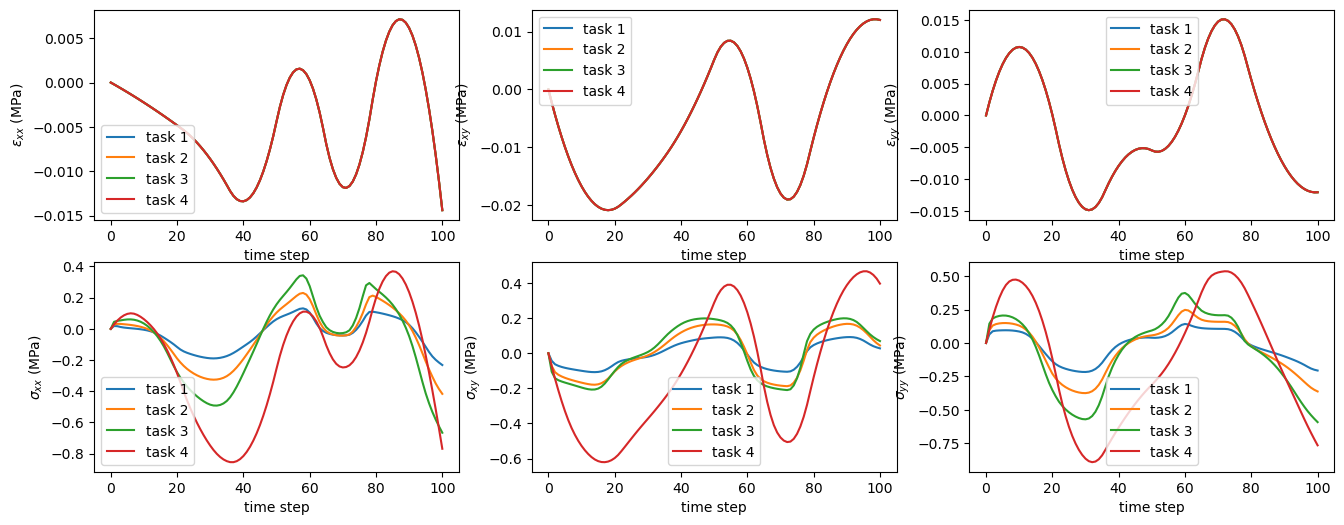

In [20]:
plot_path_dependent(task1_results=task1_results,
                    task2_results=task2_results, 
                    task3_results=task3_results, 
                    task4_results=task4_results, 
                    index=0) 